<h1 style="text-align:center"> Feature engineering dos dados das aeronaves para a geração do vetor de características e treinamento do modelo</h1>

### Autor: Luiz Fernando da Silva Borges

Considerando o contexto da criação de um modelo preditivo para a estimação de falhas em aeronaves, apresenta-se este notebook que evidencia a prototipação de uma pipeline de extração, transformação e carregamento de séries temporais de senores de motores de uma areonave em uma aplicação de auto-ml (Pycaret) com o objetivo de criar técnicas e funções que serão utilizadas para o recorte, pré-processamento e extração de características no pipeline de produção.

## 1. Análise da presença de erros em parquets

In [5]:
import os
import pandas as pd

In [6]:
# Replace 'folder_path' with the path to your folder containing Parquet files
folder_path = 'flight_data/06120091'

In [7]:
erros_df = []
not_errors_df = []

failure_column_1 = "message0418DAA-1"
failure_column_2 = "message0422DAA-1"

def detect_failure(dict_counts, failure_code):
    try:
        if dict_counts[failure_code] > 0:
            print("Falha encontrada")
            return True
    except:
            return False

# Loop through files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".parquet"):
        file_path = os.path.join(folder_path, filename)

        #print("\nReading ", filename)
        
        # Read the Parquet file into a DataFrame
        df_flight_data = pd.read_parquet(file_path)

        value_counts_failure_1 = df_flight_data[failure_column_1].value_counts().to_dict()
        value_counts_failure_2 = df_flight_data[failure_column_2].value_counts().to_dict()

        #print(value_counts_failure_1)
        #print(value_counts_failure_2)

        if detect_failure(value_counts_failure_1, 4.0):
            erros_df.append(filename)
        elif detect_failure(value_counts_failure_1, 3.0):
            erros_df.append(filename)
        else:
            not_errors_df.append(filename)

Falha encontrada
Falha encontrada
Falha encontrada
Files containing erros are:  ['TCRF_ARCHIVE_06120091_20230428193501.parquet', 'TCRF_ARCHIVE_06120091_20230515080501.parquet', 'TCRF_ARCHIVE_06120091_20230428193502.parquet']


### Verificação dos arquivos que apresentam erros de um determinado avião

In [4]:
print("Files containing erros are: ", erros_df)

Files containing erros are:  ['TCRF_ARCHIVE_06120091_20230428193501.parquet', 'TCRF_ARCHIVE_06120091_20230428193502.parquet', 'TCRF_ARCHIVE_06120091_20230515080501.parquet']


## 2. Seleção das colunas para análise e exclusão se séries com valores únicos

In [8]:
filtered_cols = ['recording_time', 'dateDay-1', 'dateMonth-1', 'dateYear-1', 'phaseOfFlight-1',
                 'message0418DAA-1','message0422DAA-1','amscHprsovDrivF-1a', 'amscHprsovDrivF-1b',
                 'amscHprsovDrivF-2b', 'amscPrsovDrivF-1a',
                 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b',
                 'basBleedLowPressF-1a', 'basBleedLowPressF-2b',
                 'basBleedLowTempF-1a', 'basBleedLowTempF-2b',
                 'basBleedOverPressF-1a', 'basBleedOverPressF-2b',
                 'basBleedOverTempF-1a', 'basBleedOverTempF-2b',
                 'bleedFavTmCmd-1a', 'bleedFavTmCmd-1b',
                 'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b', 'bleedFavTmFbk-1a',
                 'bleedFavTmFbk-1b', 'bleedFavTmFbk-2b', 'bleedHprsovCmdStatus-1a',
                 'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a',
                 'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a',
                 'bleedHprsovOpPosStatus-1b', 'bleedHprsovOpPosStatus-2a',
                 'bleedHprsovOpPosStatus-2b', 'bleedMonPress-1a',
                 'bleedMonPress-1b', 'bleedMonPress-2a', 'bleedMonPress-2b',
                 'bleedOnStatus-1a', 'bleedOnStatus-1b', 'bleedOnStatus-2b',
                 'bleedOverpressCas-2a', 'bleedOverpressCas-2b',
                 'bleedPrecoolDiffPress-1a', 'bleedPrecoolDiffPress-1b',
                 'bleedPrecoolDiffPress-2a', 'bleedPrecoolDiffPress-2b',
                 'bleedPrsovClPosStatus-1a', 'bleedPrsovClPosStatus-2a',
                 'bleedPrsovFbk-1a']

### Declaração de colunas para permanência relativas à timming e mensagens de erro

In [9]:
columns_keep = ['recording_time', 'dateDay-1', 'dateMonth-1', 'dateYear-1', 'phaseOfFlight-1', 'message0418DAA-1', 'message0422DAA-1']

In [10]:
def drop_same_value_columns(dataframe, columns_keep):
    columns_to_drop = []

    for col in dataframe.columns:
        if dataframe[col].nunique() == 1 and col not in columns_keep:
            columns_to_drop.append(col)

    if columns_to_drop:
        for col in columns_to_drop:
            print(f"Column {col} will be dropped.")

        dataframe = dataframe.drop(columns=columns_to_drop)
        print(f"{len(columns_to_drop)} columns dropped.")

    return dataframe

In [11]:
df_failures_selected_list = []

for df_error in erros_df:
    df_flight_failure = pd.read_parquet(folder_path + "/" + df_error)
    df_flight_failure = df_flight_failure[filtered_cols]
    df_flight_failure = drop_same_value_columns(df_flight_failure, columns_keep)
    print(df_flight_failure.head(3))
    df_failures_selected_list.append(df_flight_failure)

Column amscHprsovDrivF-1a will be dropped.
Column amscHprsovDrivF-1b will be dropped.
Column amscHprsovDrivF-2b will be dropped.
Column amscPrsovDrivF-1a will be dropped.
Column amscPrsovDrivF-1b will be dropped.
Column amscPrsovDrivF-2b will be dropped.
Column basBleedLowPressF-1a will be dropped.
Column basBleedLowPressF-2b will be dropped.
Column basBleedLowTempF-1a will be dropped.
Column basBleedLowTempF-2b will be dropped.
Column basBleedOverPressF-1a will be dropped.
Column basBleedOverPressF-2b will be dropped.
Column basBleedOverTempF-1a will be dropped.
Column basBleedOverTempF-2b will be dropped.
Column bleedFavTmCmd-2a will be dropped.
Column bleedFavTmFbk-1a will be dropped.
Column bleedHprsovCmdStatus-1b will be dropped.
Column bleedHprsovCmdStatus-2b will be dropped.
Column bleedHprsovOpPosStatus-1a will be dropped.
Column bleedHprsovOpPosStatus-1b will be dropped.
Column bleedHprsovOpPosStatus-2a will be dropped.
Column bleedHprsovOpPosStatus-2b will be dropped.
Column 

## 3. Escolha dos eventos de falha para o corte das épocas do conjunto de dados com falhas e no conjunto de dados sem falhas

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_all_columns(dataframe, num_rows, num_cols, fig_name, red_lines=None, green_lines=None, line_w = 0.5):
    num_plots = len(dataframe.columns)
    plot_index = 0
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
    
    for row in range(num_rows):
        for col in range(num_cols):
            if plot_index < num_plots:
                col_name = dataframe.columns[plot_index]
                ax = axes[row, col]
                
                try:
                    ax.plot(dataframe[col_name], marker='o')
                    ax.set_title(f'Line Plot for Column: {col_name}')
                    ax.set_xlabel('Index')
                    ax.set_ylabel(col_name)
                    ax.grid()

                    # Add red vertical lines
                    if red_lines:
                        for line_index in red_lines:
                            ax.axvline(x=line_index, color='red', linestyle='--', linewidth=line_w)

                    # Add green vertical lines
                    if green_lines:
                        for line_index in green_lines:
                            ax.axvline(x=line_index, color='green', linestyle='--', linewidth=0.01)
                except:
                    print(f'Could not plot for column: {col_name}')
                
                plot_index += 1
            else:
                axes[row, col].axis('off')

    plt.savefig(fig_name)
    
    plt.tight_layout()
    plt.show()

[3, 23, 43, 63, 83, 103, 123, 143, 163, 183, 203, 223, 243, 263, 283, 303, 323, 343, 363, 383, 403, 423, 443, 463, 483, 503, 523, 543, 563, 583, 603, 623, 643, 663, 683, 703, 723, 743, 763, 783, 803, 823, 843, 863, 883, 903, 943, 963, 1003, 1023, 1043, 1063, 1083, 1103, 1123, 1143, 1163, 1183, 1203, 1243, 1263, 1283, 1303, 1323, 1343, 1363, 1383, 1403, 1423, 1443, 1463, 1483, 1503, 1523, 1543, 1563, 1583, 1603, 1623, 1643, 1663, 1683, 1703, 1723, 1743, 1763, 1783, 1803, 1823, 1843, 1863, 1883, 1903, 1923, 1943, 1963, 1983, 2003, 2023, 2043, 2063, 2083, 2103, 2123, 2143, 2163, 2183, 2203, 2223, 2243, 2263, 2283, 2303, 2323, 2343, 2363, 2383, 2403, 2423, 2443, 2463, 2483, 2503, 2523, 2543, 2563, 2583, 2603, 2623, 2643, 2663, 2683, 2703, 2723, 2743, 2763, 2783, 2803, 2823, 2843, 2863, 2883, 2903, 2923, 2943, 2963, 2983, 3003, 3023, 3043, 3063, 3083, 3103, 3123, 3143, 3163, 3183, 3203, 3223, 3243, 3263, 3283, 3303, 3323, 3343, 3363, 3383, 3403, 3423, 3443, 3463, 3483, 3503, 3523, 3543, 356

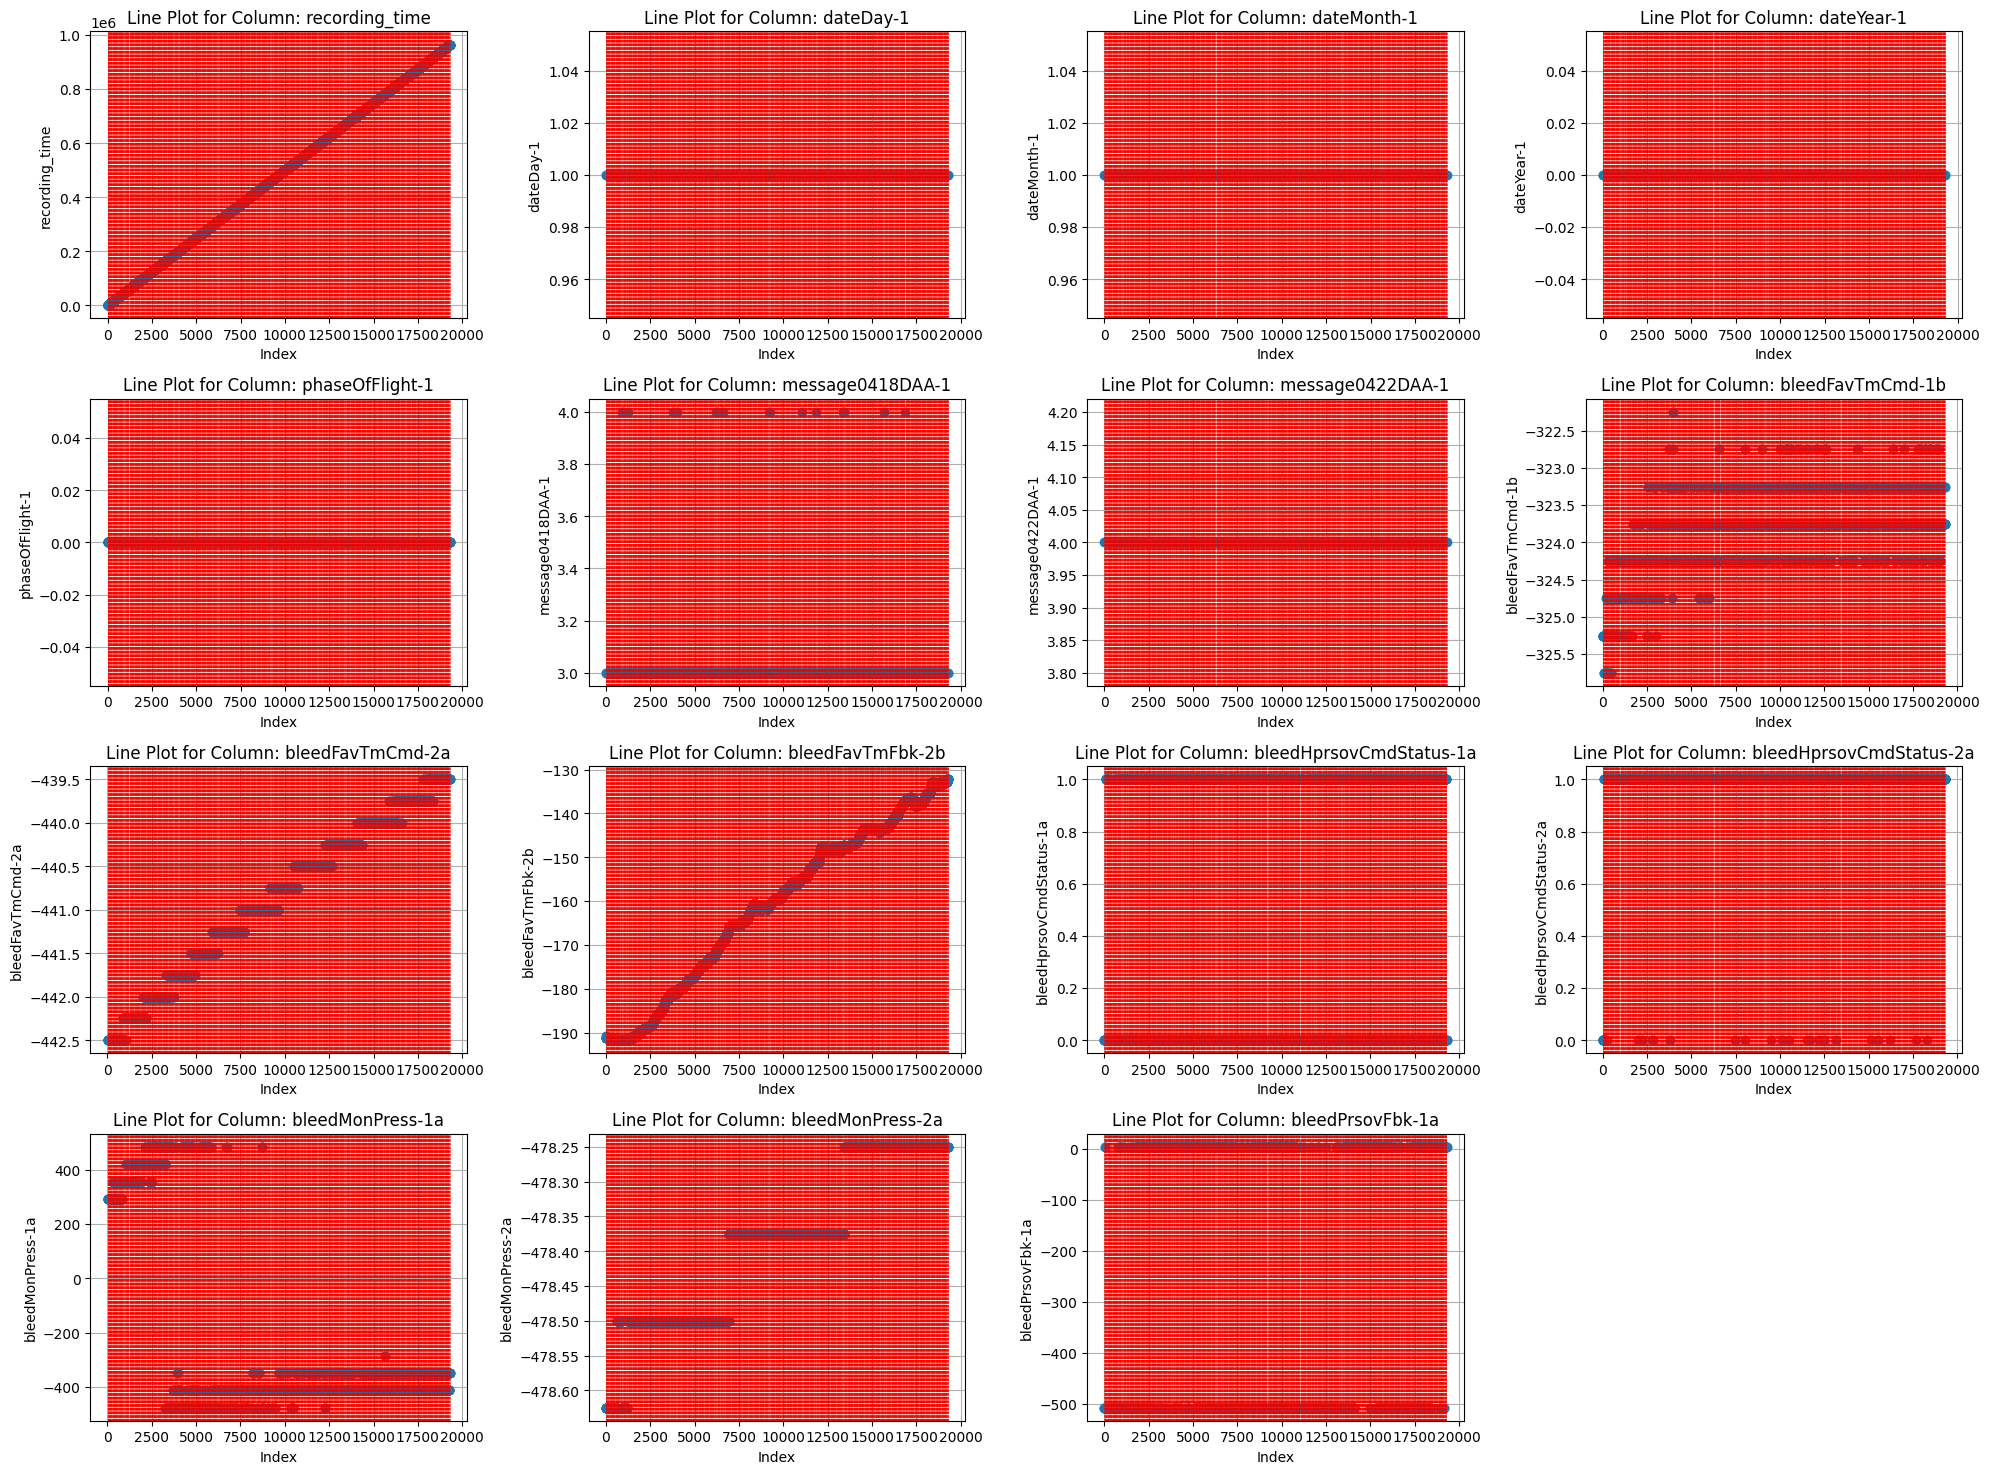

In [13]:
df_number = 1

failure_indexes_3 = []
failure_indexes_4 = []

failure_indexes_3.append(list(df_failures_selected_list[df_number][df_failures_selected_list[df_number][failure_column_1] == 3.0].index))#
failure_indexes_3.append(list(df_failures_selected_list[df_number][df_failures_selected_list[df_number][failure_column_2] == 3.0].index))

failure_indexes_3 = [num for sublist in failure_indexes_3 for num in sublist]

failure_indexes_4.append(list(df_failures_selected_list[df_number][df_failures_selected_list[df_number][failure_column_1] == 4.0].index))
failure_indexes_4.append(list(df_failures_selected_list[df_number][df_failures_selected_list[df_number][failure_column_2] == 4.0].index))

failure_indexes_4 = [num for sublist in failure_indexes_4 for num in sublist]

In [11]:
print("Índices de falha do tipo 3")
print(failure_indexes_3)
print()

print("Índices de falha do tipo 4")
print(failure_indexes_4)
print()

Índices de falha do tipo 3
[1023, 1103, 1123, 1143, 1163, 1183, 2363, 2783, 3603, 4003, 4023, 4043, 4303, 4323, 4343, 4363, 4383, 4403, 4783, 4843, 4863, 5643, 7104, 7204, 7224, 7304, 7584, 7604, 7624, 7664, 8324, 8344, 8364, 8384, 8404, 8924, 8964, 8984, 9024, 9084, 9204, 9224, 9284, 9524, 10404, 10424, 10444, 10464, 10504, 10524, 10544, 10584, 10604, 10664, 10844, 10884, 10904, 10924, 12085, 12105, 12125, 12145, 12165, 12185, 12205, 12225, 12245, 12265, 12425, 12445, 12505, 13045, 14145, 14205, 14225, 14245, 14265, 14285, 14425, 15105, 15405, 15485, 15805, 15825, 15845, 15865, 15885, 15905, 15945, 16885, 17125, 17145, 17165, 17185, 17445, 17485, 17505, 17525, 17545, 17565, 18546, 18646, 18706, 18726, 18746, 18766, 18786, 18806, 18906, 18946, 19026, 19046, 19206, 19566, 19586, 19606, 20206, 20326, 20386, 20406, 20426, 20446, 20666, 20746, 20766, 20786, 20806, 20826, 21266, 21966, 22006, 22046, 22086, 22526, 23166, 23186, 23206, 23226, 23246, 23286, 23606, 23626, 23646, 23686, 23706, 2

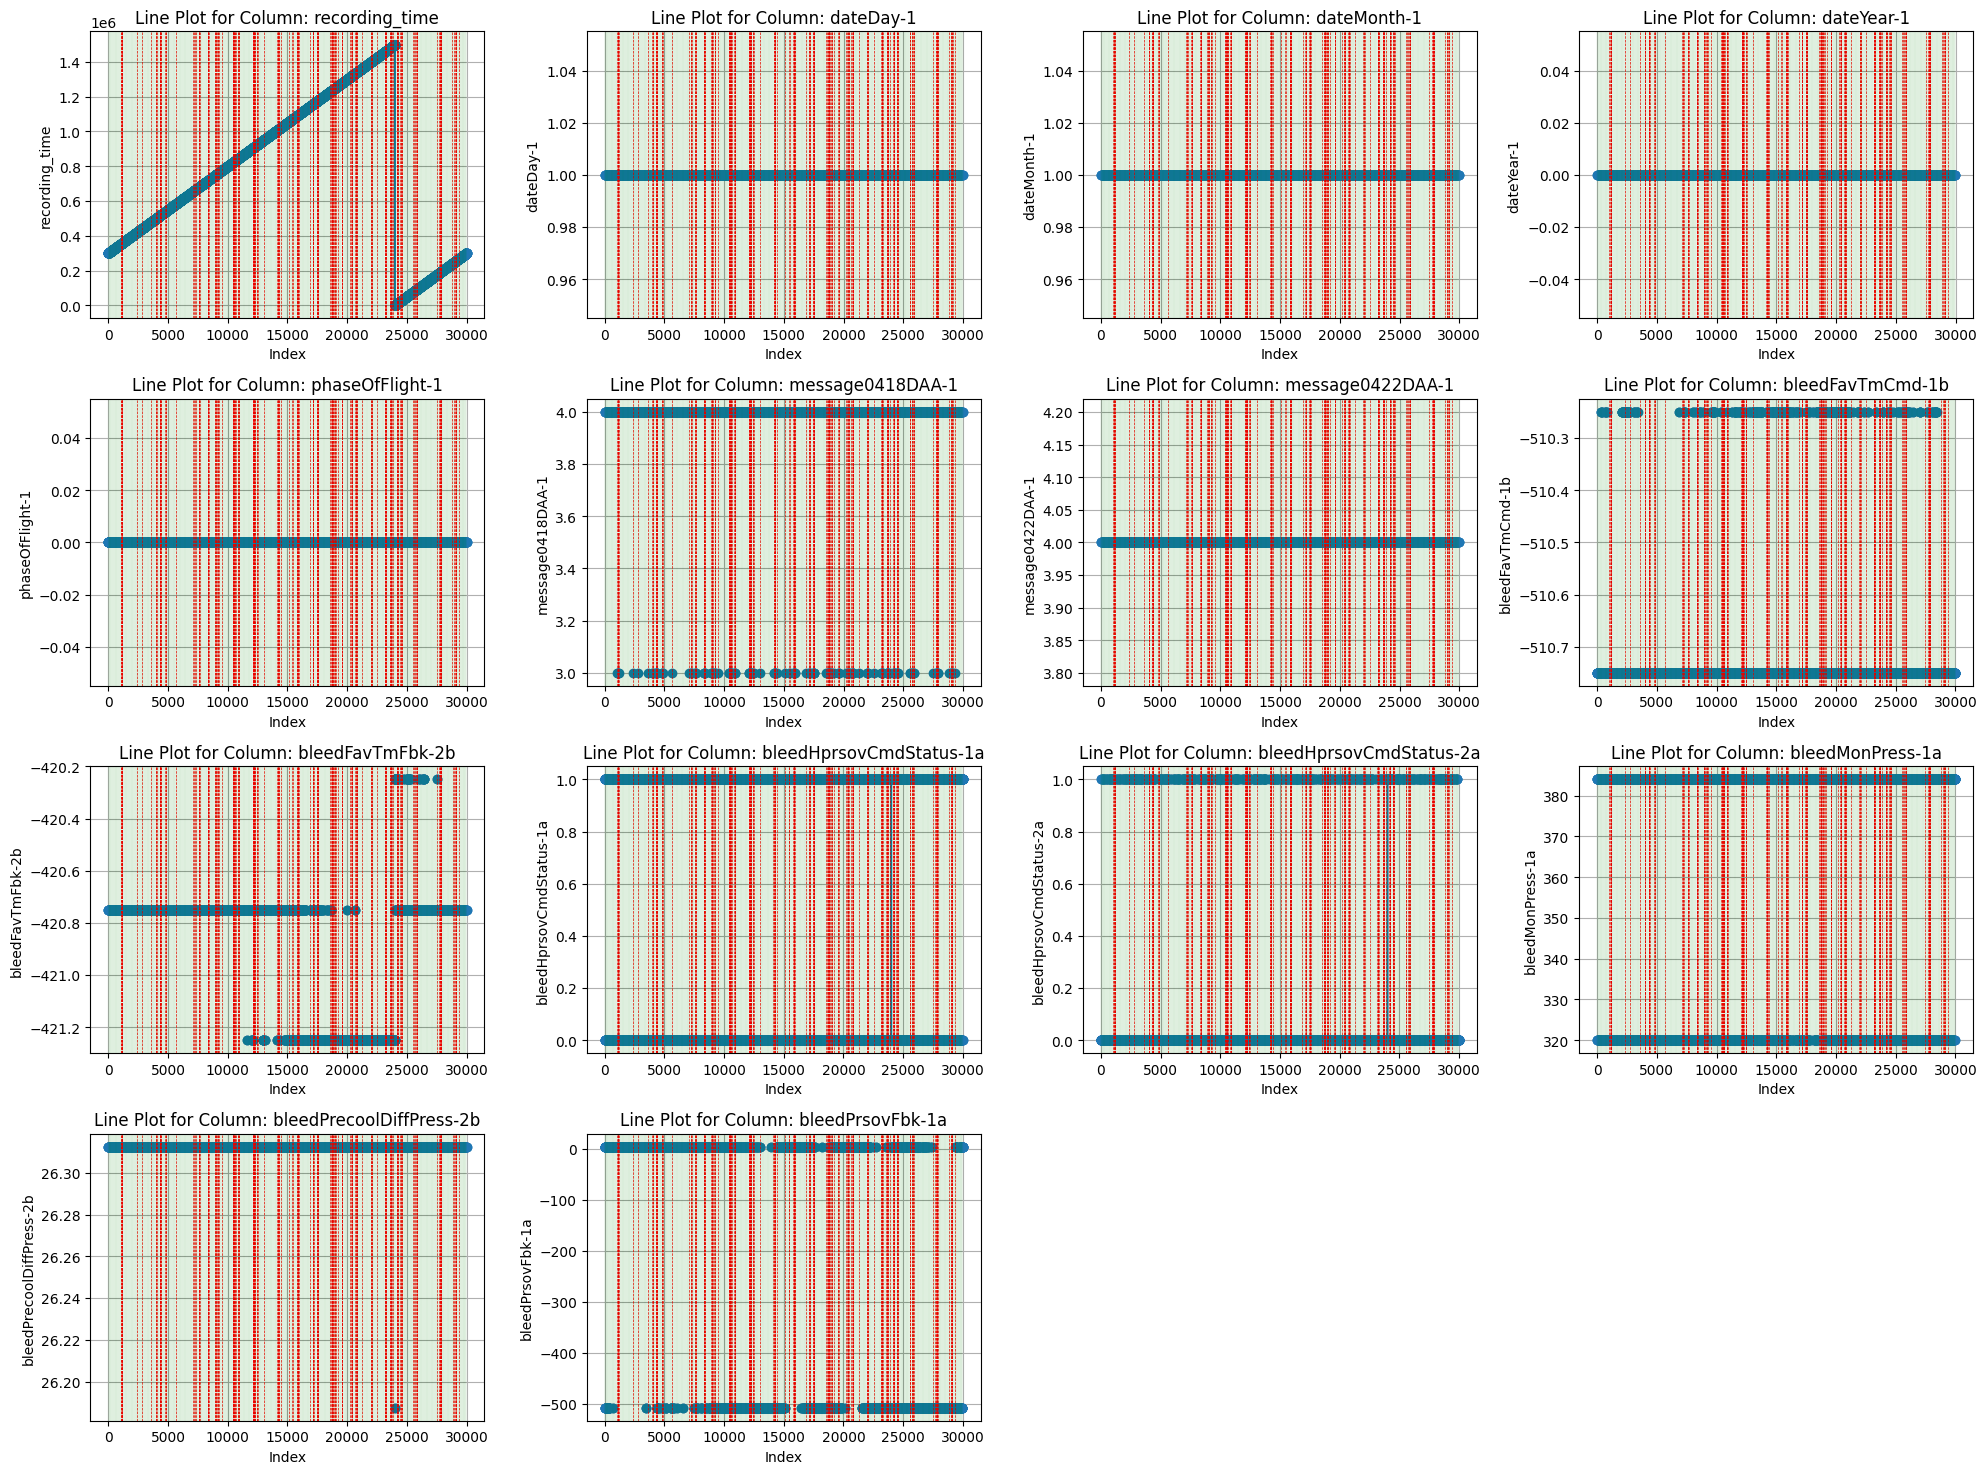

In [12]:
# Assuming df_fail_flights is your DataFrame
plot_all_columns(df_failures_selected_list[df_number], 4, 4, "all", red_lines=failure_indexes_3, green_lines=failure_indexes_4, line_w = 0.5)

### Escolha dos índices de falha

In [14]:
failure_indexes = [10000, 20000, 24000]

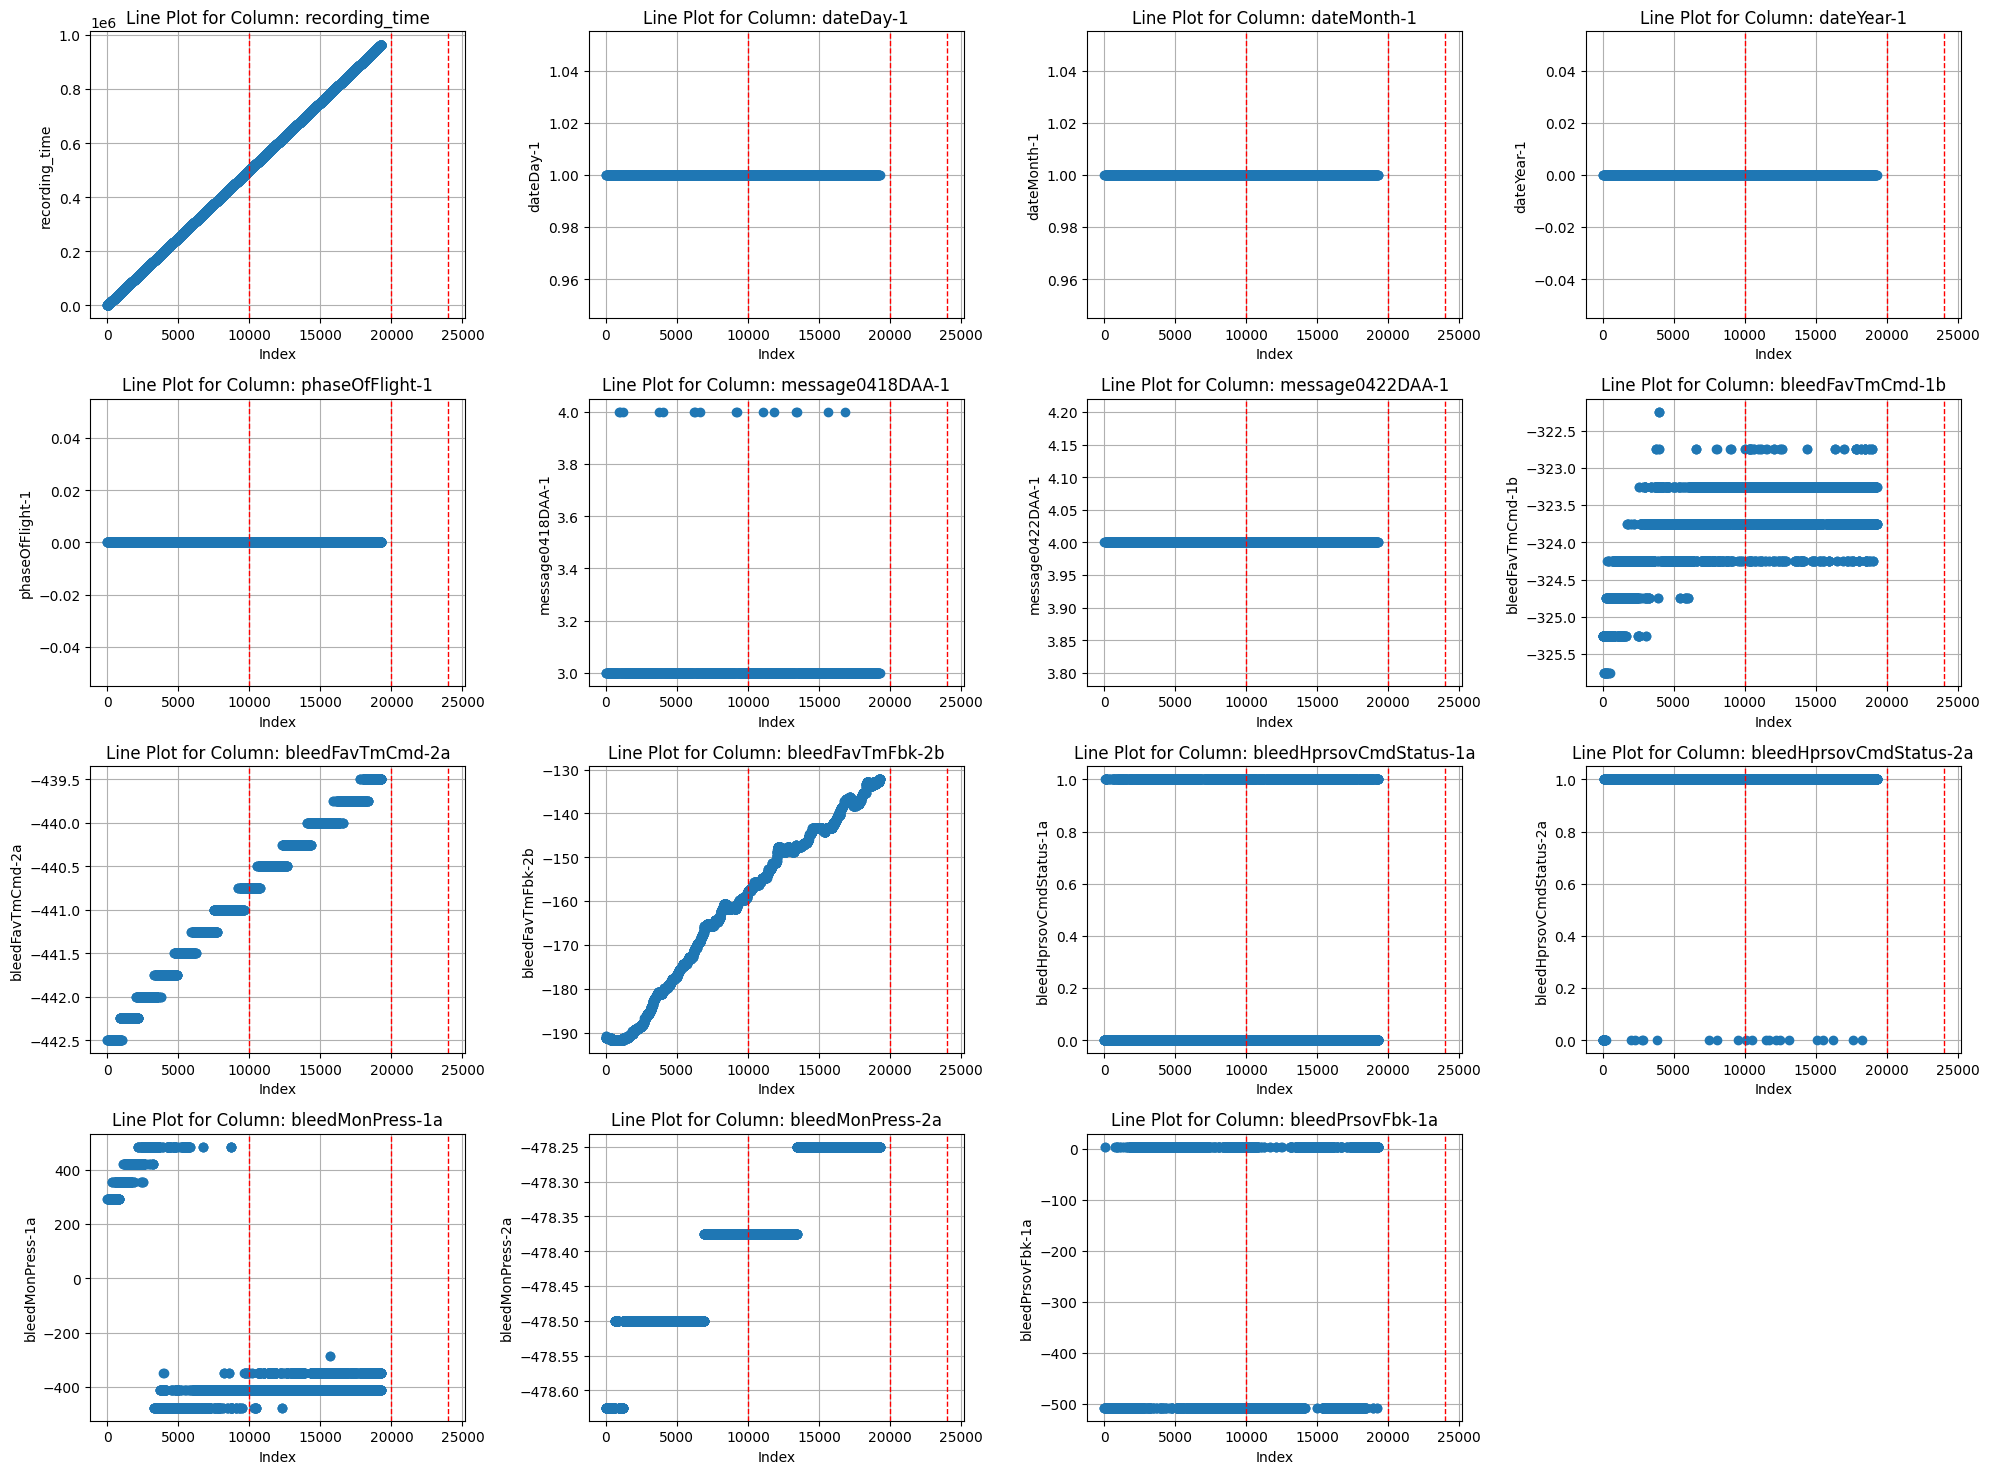

In [15]:
plot_all_columns(df_failures_selected_list[df_number], 4, 4, "all", red_lines=failure_indexes, green_lines=[], line_w = 1)

### Escolha de um conjunto de dados sem falhas

In [16]:
baseline_df = pd.read_parquet(folder_path + "/" + not_errors_df[7])
baseline_df = baseline_df[filtered_cols]
baseline_df = drop_same_value_columns(baseline_df, columns_keep)
baseline_df.head(3)

Column amscHprsovDrivF-1a will be dropped.
Column amscHprsovDrivF-1b will be dropped.
Column amscHprsovDrivF-2b will be dropped.
Column amscPrsovDrivF-1a will be dropped.
Column amscPrsovDrivF-1b will be dropped.
Column amscPrsovDrivF-2b will be dropped.
Column basBleedLowPressF-1a will be dropped.
Column basBleedLowPressF-2b will be dropped.
Column basBleedLowTempF-1a will be dropped.
Column basBleedLowTempF-2b will be dropped.
Column basBleedOverPressF-1a will be dropped.
Column basBleedOverPressF-2b will be dropped.
Column basBleedOverTempF-1a will be dropped.
Column basBleedOverTempF-2b will be dropped.
Column bleedFavTmCmd-1a will be dropped.
Column bleedFavTmCmd-2a will be dropped.
Column bleedFavTmCmd-2b will be dropped.
Column bleedHprsovCmdStatus-1a will be dropped.
Column bleedHprsovCmdStatus-2a will be dropped.
Column bleedHprsovCmdStatus-2b will be dropped.
Column bleedOverpressCas-2a will be dropped.
Column bleedOverpressCas-2b will be dropped.
22 columns dropped.


,recording_time,dateDay-1,dateMonth-1,dateYear-1,phaseOfFlight-1,message0418DAA-1,message0422DAA-1,bleedFavTmCmd-1b,bleedFavTmFbk-1a,bleedFavTmFbk-1b,...,bleedOnStatus-1a,bleedOnStatus-1b,bleedOnStatus-2b,bleedPrecoolDiffPress-1a,bleedPrecoolDiffPress-1b,bleedPrecoolDiffPress-2a,bleedPrecoolDiffPress-2b,bleedPrsovClPosStatus-1a,bleedPrsovClPosStatus-2a,bleedPrsovFbk-1a
0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1,50,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.125,1.25,...,NaN,NaN,NaN,0.125,0.09375,0.03125,0.03125,NaN,NaN,0.375
2,100,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


### Plot do conjunto de dados sem falhas com os índices de análise escolhidos

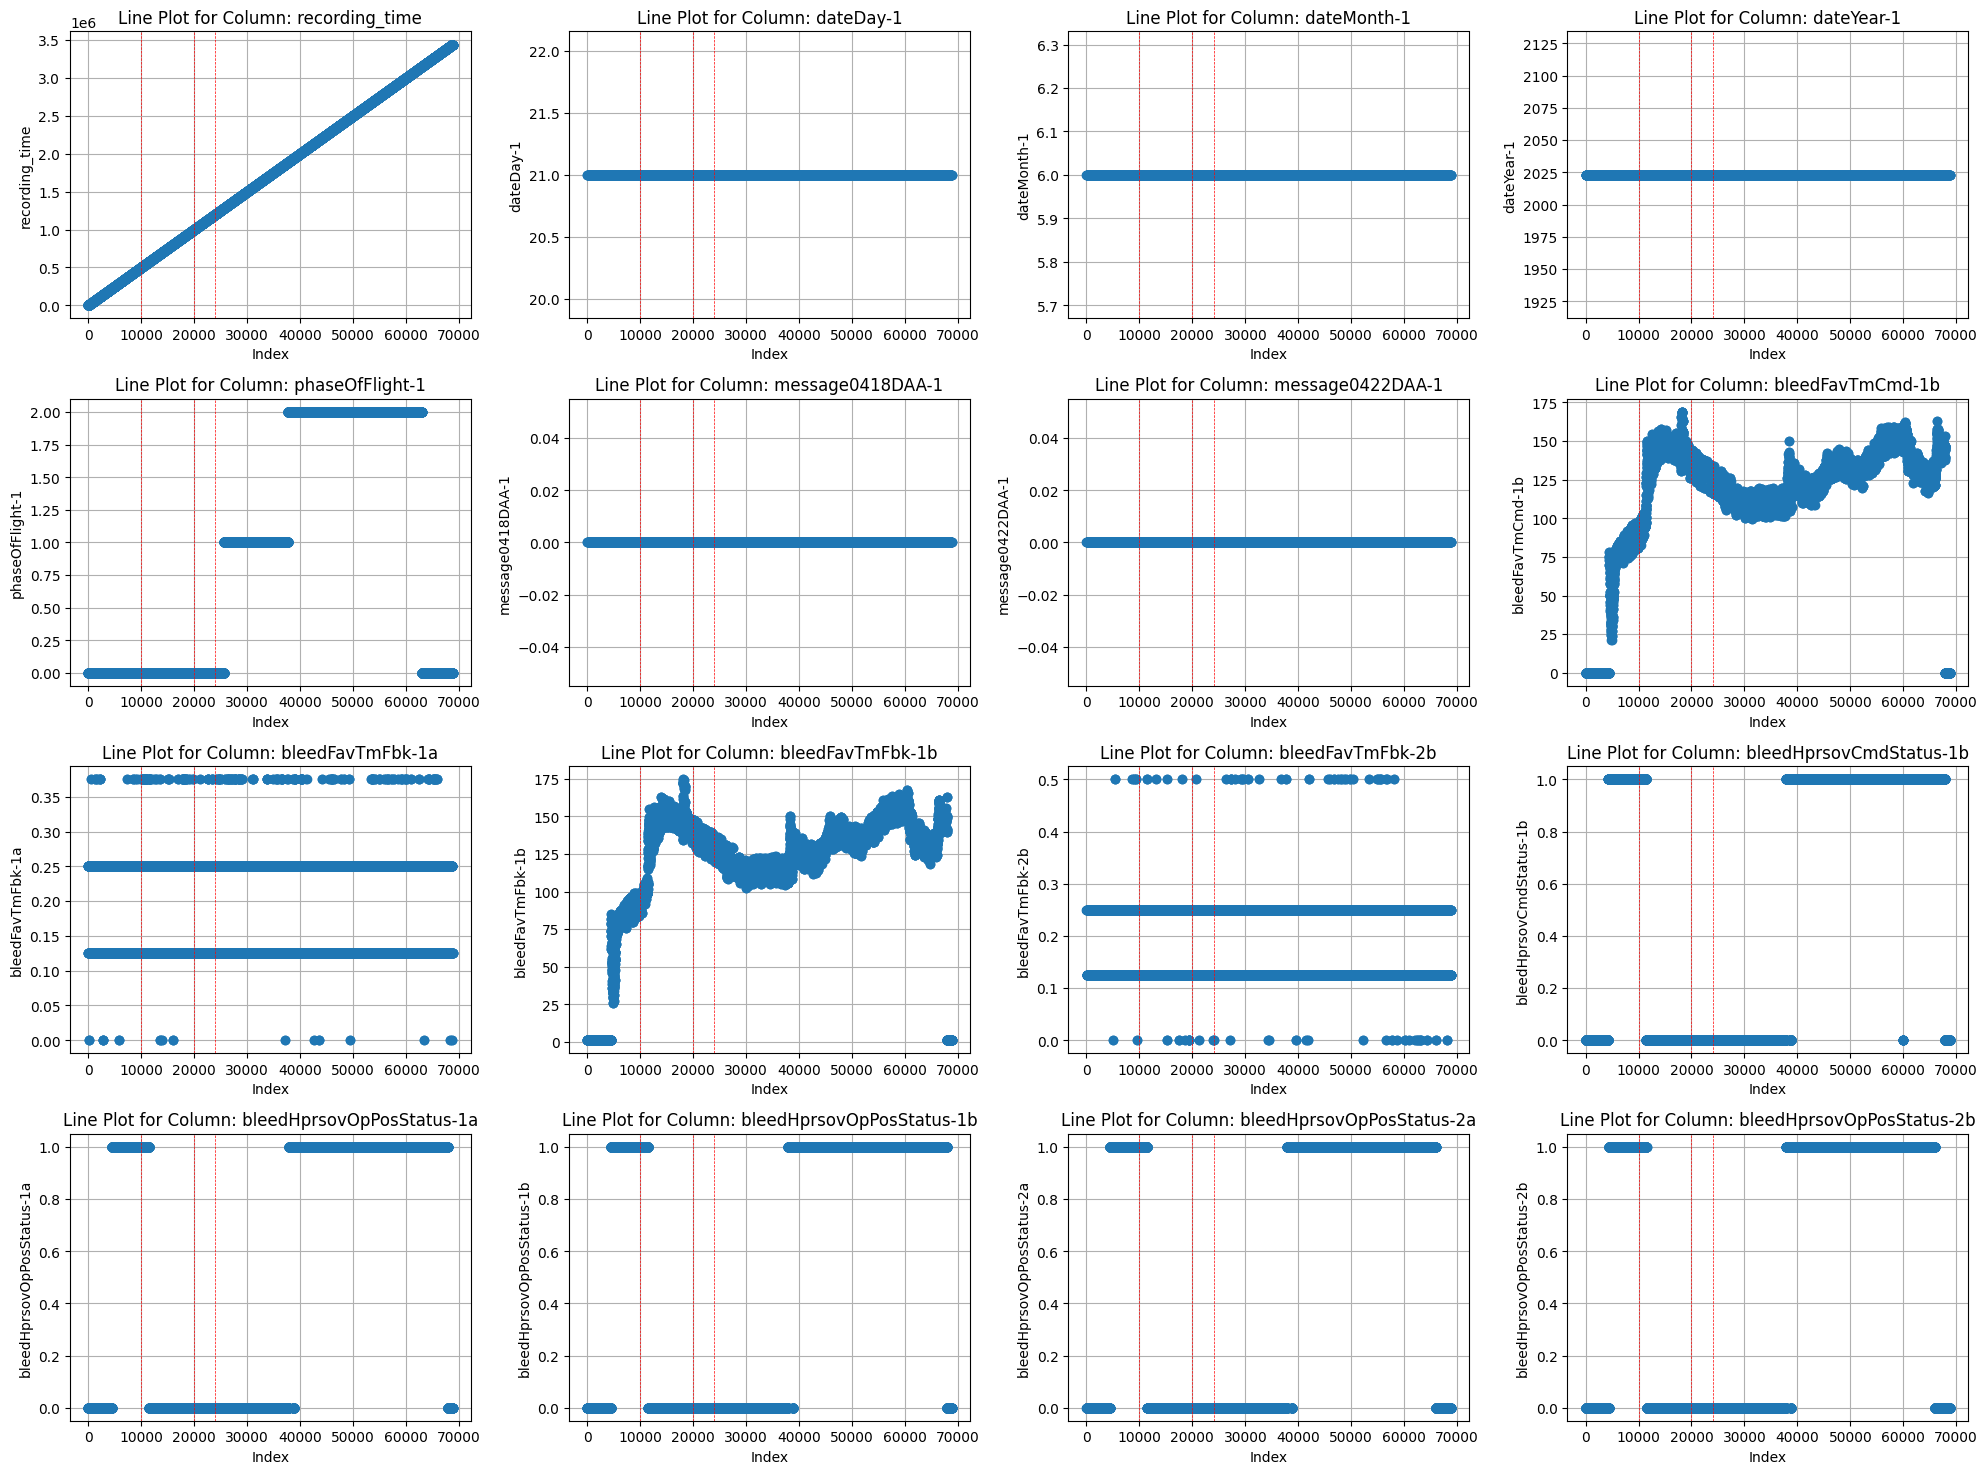

In [17]:
plot_all_columns(baseline_df, 4, 4, "all", red_lines=failure_indexes, green_lines=[])

## 4. Seleção de épocas 5 minutos antes dos eventos de falha acontecerem

In [18]:
1/0.05 
20*60*5

6000

### Seleção para o conjunto de falhas

In [19]:
failure_data = {}
for col in df_failures_selected_list[df_number].columns:
    if "bleed" in col:
        failure_data[col+"_1"] = df_failures_selected_list[df_number][col][failure_indexes[0]-6000:failure_indexes[0]]
        failure_data[col+"_1"] = df_failures_selected_list[df_number][col][failure_indexes[1]-6000:failure_indexes[1]]
        failure_data[col+"_1"] = df_failures_selected_list[df_number][col][failure_indexes[2]-6000:failure_indexes[2]]
        
df_failure_data = pd.DataFrame(failure_data)

df_failure_data.head(7)
        

TypeError: cannot do slice indexing on RangeIndex with these indexers [[10000, 20000, 24000]] of type list

### Seleção para o conjunto de não falhas

In [ ]:
non_failure_data = {}
for col in df_failures_selected_list[df_number].columns:
    if "bleed" in col:
        non_failure_data[col+"_1"] = df_failures_selected_list[df_number][col][failure_indexes[0]-1000:failure_indexes[0]+1000]
        non_failure_data[col+"_1"] = df_failures_selected_list[df_number][col][failure_indexes[1]-1000:failure_indexes[1]+1000]
        non_failure_data[col+"_1"] = df_failures_selected_list[df_number][col][failure_indexes[2]-1000:failure_indexes[2]+1000]
        
df_non_failure_data = pd.DataFrame(non_failure_data)

df_non_failure_data.head(7)

### Plot de comparação de épocas para conjunto de dados de falha e não falha

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_columns_from_two_dataframes(df1, df2, column_names, num_rows, num_cols, fig_name, red_lines=None, green_lines=None, line_w=1):
    num_plots = len(column_names)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
    
    for row in range(num_rows):
        for col in range(num_cols):
            if num_plots > 0 and column_names:
                col_name = column_names.pop(0)
                ax = axes[row, col]
                
                try:
                    ax.plot(df1[col_name], marker='o', label='DataFrame 1')
                    ax.plot(df2[col_name], marker='x', label='DataFrame 2')
                    ax.set_title(f'Line Plot for Column: {col_name}')
                    ax.set_xlabel('Index')
                    ax.set_ylabel(col_name)
                    ax.grid()
                    ax.legend()  # Add legend to distinguish between DataFrame 1 and DataFrame 2

                    # Add red vertical lines
                    if red_lines:
                        for line_index in red_lines:
                            ax.axvline(x=line_index, color='red', linestyle='--', linewidth=line_w)

                    # Add green vertical lines
                    if green_lines:
                        for line_index in green_lines:
                            ax.axvline(x=line_index, color='green', linestyle='--', linewidth=0.01)
                except:
                    print(f'Could not plot for column: {col_name}')
                
            else:
                axes[row, col].axis('off')

    plt.savefig(fig_name)
    plt.tight_layout()
    plt.show()

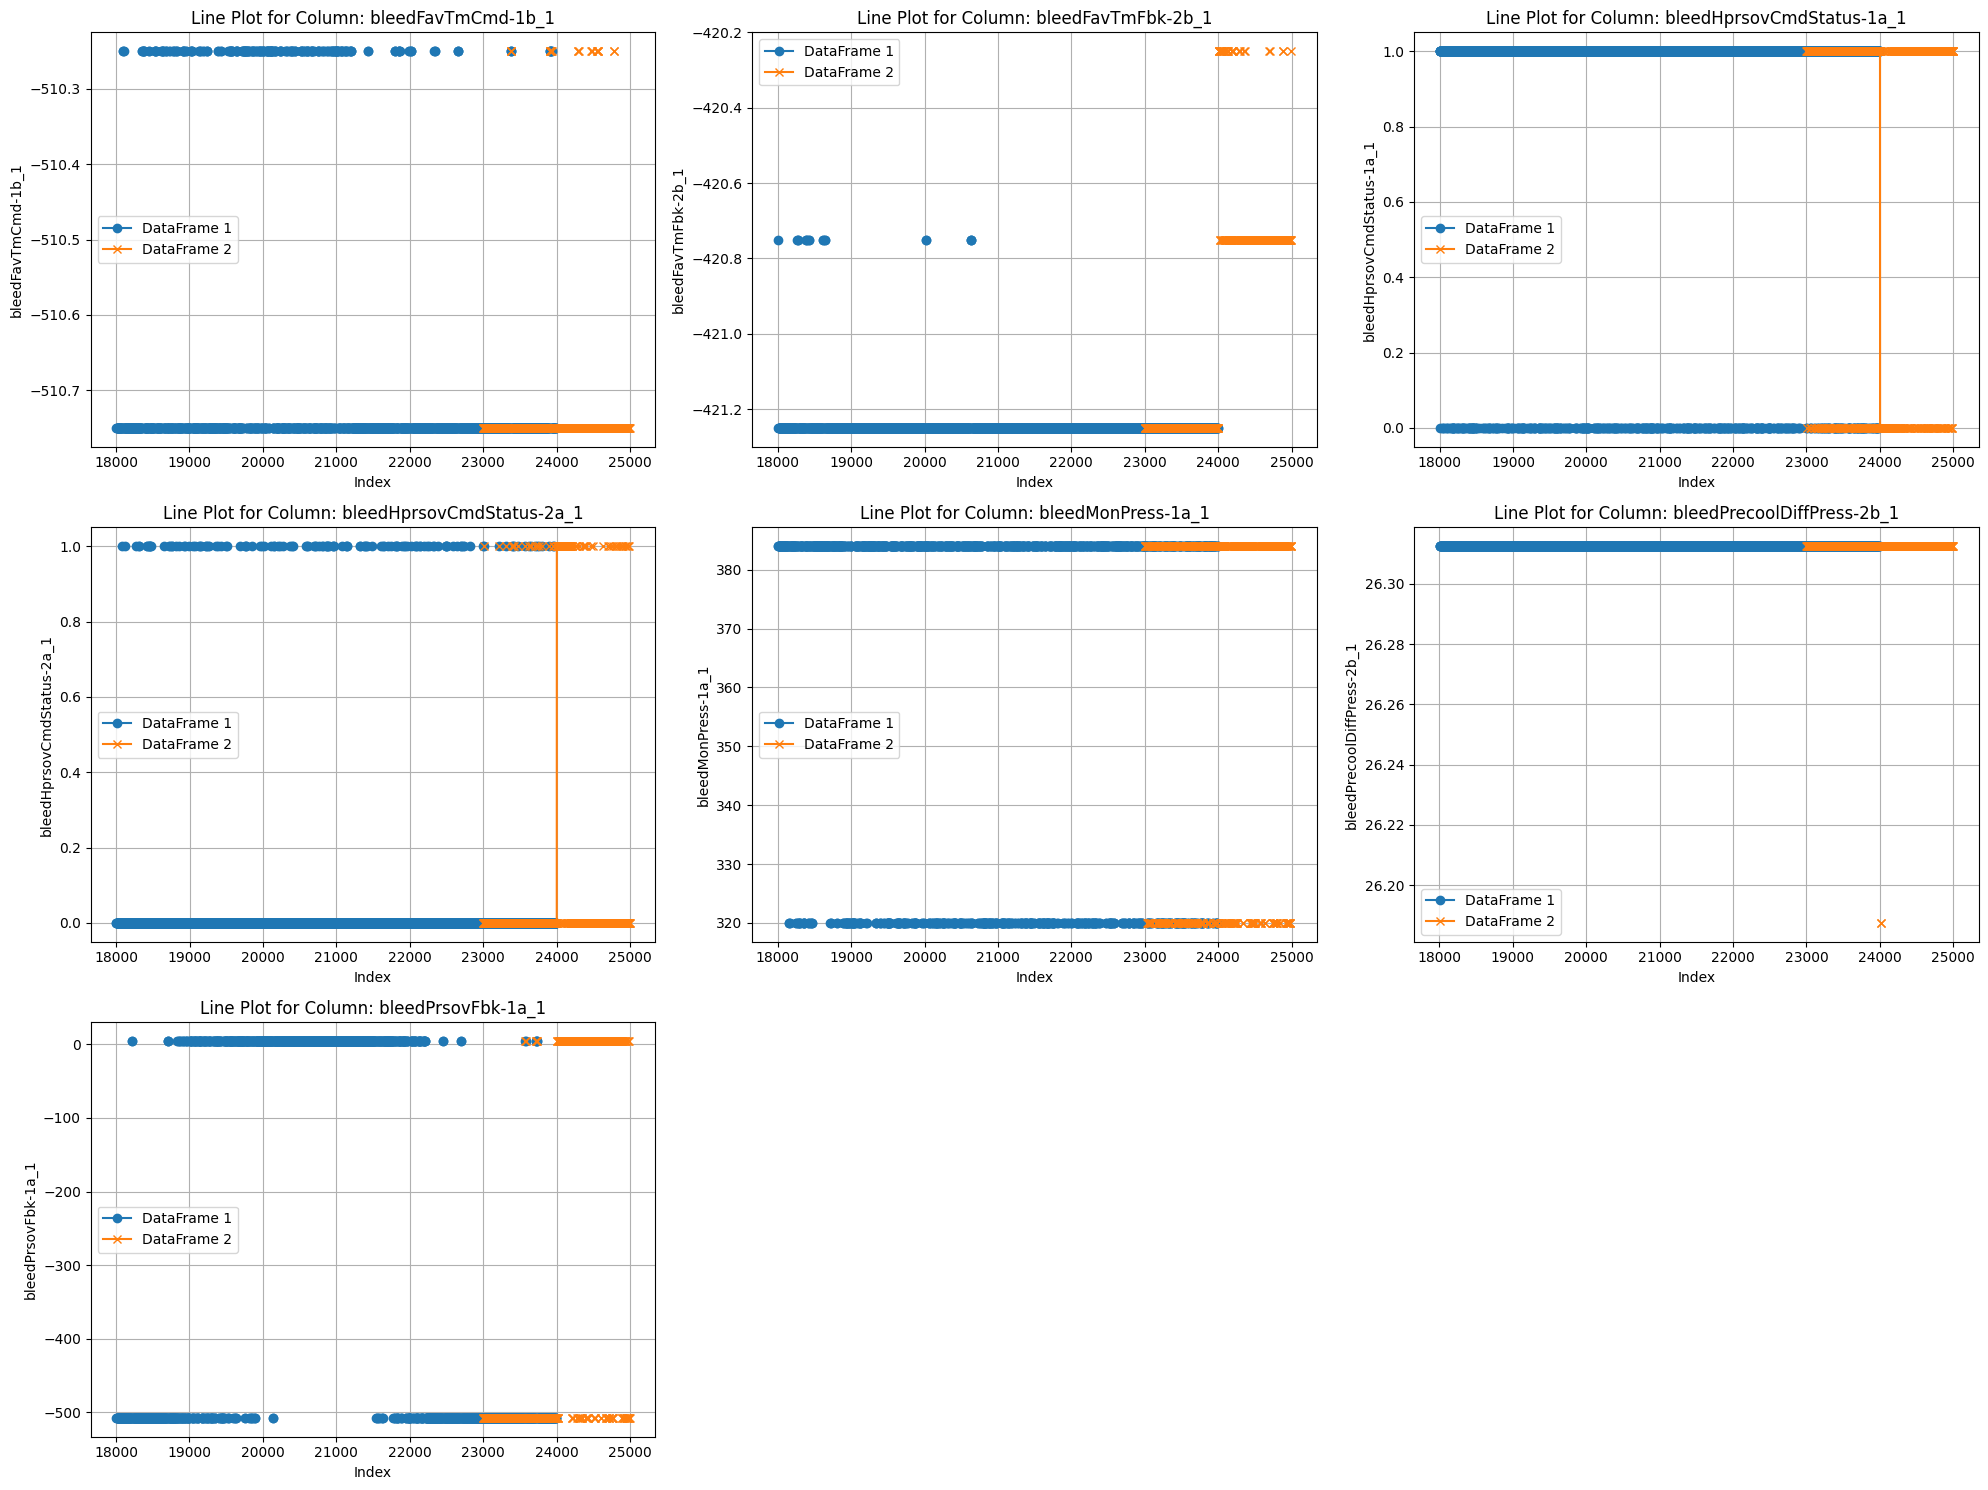

In [21]:
plot_columns_from_two_dataframes(df_failure_data, df_non_failure_data, df_non_failure_data.columns.tolist(), 3, 3, "combined_plot.png", red_lines=[], green_lines=[])

## 5. Fusão dos conjuntos de dados de falha e não falha para o treinamento do modelo

### Adição da coluna "label" com o número 1 para representar que cada dado pertence a um conjunto de dados que descrevem uma falha

In [ ]:
df_failure_data["label"] = [1]*len(df_failure_data)
df_failure_data.head(3)

### Adição da coluna "label" com o número 0 para representar que cada dado pertence a um conjunto de dados que não descrevem uma falha

In [ ]:
df_non_failure_data["label"] = [0]*len(df_non_failure_data)
df_non_failure_data.head(3)

### Junção de ambos os cojuntos de dados para a criação do dataframe de treinamento no auto machinne learning Pycaret

In [ ]:
model_combined_df.tail(7)

## 6. Classificação

In [ ]:
from pycaret.classification import *

### Treinamento de classificadores com os dados crus

In [27]:
# Initialize PyCaret setup
exp = setup(model_combined_df, target='label')

# Compare and evaluate different models
compare_models()

,Description,Value
0,Session id,5014
1,Target,label
2,Target type,Binary
3,Original data shape,"(8000, 8)"
4,Transformed data shape,"(8000, 8)"
5,Transformed train set shape,"(5600, 8)"
6,Transformed test set shape,"(2400, 8)"
7,Numeric features,7
8,Rows with missing values,100.0%
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7787,0.6354,0.9755,0.7830,0.8687,0.2167,0.2849,0.6820
nb,Naive Bayes,0.7784,0.5809,0.9755,0.7827,0.8685,0.2151,0.2833,0.6170
qda,Quadratic Discriminant Analysis,0.7784,0.6281,0.9762,0.7824,0.8686,0.2137,0.2834,0.6730
lr,Logistic Regression,0.7770,0.6342,0.9936,0.7736,0.8698,0.1679,0.2776,1.1650
knn,K Neighbors Classifier,0.7766,0.6190,0.9771,0.7804,0.8677,0.2030,0.2763,0.6590
dt,Decision Tree Classifier,0.7759,0.6303,0.9798,0.7787,0.8677,0.1931,0.2724,0.6050
gbc,Gradient Boosting Classifier,0.7759,0.6305,0.9798,0.7787,0.8677,0.1931,0.2724,0.9780
lightgbm,Light Gradient Boosting Machine,0.7759,0.6302,0.9798,0.7787,0.8677,0.1931,0.2724,0.8470
rf,Random Forest Classifier,0.7757,0.6308,0.9798,0.7786,0.8676,0.1923,0.2717,0.7120
et,Extra Trees Classifier,0.7757,0.6303,0.9798,0.7786,0.8676,0.1923,0.2717,0.7400


LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [28]:
trainning_results_raw = pull()

### Treinamento de classificadores considerando a eliminação de valores NaNs

In [29]:
pre_processed = model_combined_df.fillna(0, inplace=False)

In [30]:
exp_1 = setup(pre_processed, target='label')

# Compare and evaluate different models
compare_models()

,Description,Value
0,Session id,2650
1,Target,label
2,Target type,Binary
3,Original data shape,"(8000, 8)"
4,Transformed data shape,"(8000, 8)"
5,Transformed train set shape,"(5600, 8)"
6,Transformed test set shape,"(2400, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.7791,0.6428,0.9974,0.7736,0.8714,0.1710,0.2946,0.6430
rf,Random Forest Classifier,0.7791,0.6422,0.9974,0.7736,0.8714,0.1710,0.2946,0.7950
gbc,Gradient Boosting Classifier,0.7791,0.6410,0.9974,0.7736,0.8714,0.1710,0.2946,0.6840
et,Extra Trees Classifier,0.7791,0.6428,0.9974,0.7736,0.8714,0.1710,0.2946,0.7400
lightgbm,Light Gradient Boosting Machine,0.7791,0.6423,0.9974,0.7736,0.8714,0.1710,0.2946,0.7680
ada,Ada Boost Classifier,0.7786,0.6379,0.9967,0.7735,0.8710,0.1699,0.2907,0.7060
lr,Logistic Regression,0.7775,0.6328,0.9974,0.7723,0.8705,0.1625,0.2860,0.7070
qda,Quadratic Discriminant Analysis,0.7762,0.6423,0.9729,0.7821,0.8671,0.2104,0.2763,0.7200
lda,Linear Discriminant Analysis,0.7741,0.6382,0.9786,0.7778,0.8666,0.1871,0.2687,0.6690
ridge,Ridge Classifier,0.7686,0.0000,0.9979,0.7652,0.8661,0.1108,0.1960,0.6090


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=2650, splitter='best')

In [31]:
trainning_results_raw_zeros = pull()

### Treinamento de classificadores considerando a normalização dos valores dos sensores

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named 'df'
scaler = MinMaxScaler()
pre_processed_normalized = pd.DataFrame(scaler.fit_transform(pre_processed), columns=pre_processed.columns)

In [33]:
pre_processed_normalized.tail()

,bleedFavTmCmd-1b_1,bleedFavTmFbk-2b_1,bleedHprsovCmdStatus-1a_1,bleedHprsovCmdStatus-2a_1,bleedMonPress-1a_1,bleedPrecoolDiffPress-2b_1,bleedPrsovFbk-1a_1,label
7995,1.0,1.000000,0.0,0.0,0.0,0.0,0.991455,0.0
7996,1.0,1.000000,1.0,0.0,0.0,0.0,0.991455,0.0
7997,0.0,0.002374,0.0,0.0,1.0,1.0,0.000000,0.0
7998,1.0,1.000000,1.0,0.0,0.0,0.0,0.991455,0.0
7999,1.0,1.000000,0.0,0.0,0.0,0.0,0.991455,0.0


In [34]:
exp_1 = setup(pre_processed_normalized, target='label')

# Compare and evaluate different models
compare_models()

,Description,Value
0,Session id,4022
1,Target,label
2,Target type,Binary
3,Original data shape,"(8000, 8)"
4,Transformed data shape,"(8000, 8)"
5,Transformed train set shape,"(5600, 8)"
6,Transformed test set shape,"(2400, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.7798,0.6531,0.9750,0.7841,0.8692,0.2232,0.2911,0.6780
lda,Linear Discriminant Analysis,0.7796,0.6513,0.9750,0.7839,0.8691,0.2224,0.2903,0.6890
rf,Random Forest Classifier,0.7793,0.6526,0.9919,0.7761,0.8708,0.1841,0.2930,0.9060
gbc,Gradient Boosting Classifier,0.7793,0.6521,0.9919,0.7761,0.8708,0.1841,0.2930,0.7620
dt,Decision Tree Classifier,0.7789,0.6526,0.9898,0.7768,0.8704,0.1869,0.2905,0.6640
et,Extra Trees Classifier,0.7789,0.6526,0.9898,0.7768,0.8704,0.1869,0.2905,0.8410
lightgbm,Light Gradient Boosting Machine,0.7789,0.6524,0.9898,0.7768,0.8704,0.1869,0.2905,0.8120
ada,Ada Boost Classifier,0.7780,0.6512,0.9910,0.7755,0.8701,0.1798,0.2863,0.7450
dummy,Dummy Classifier,0.7500,0.5000,1.0000,0.7500,0.8571,0.0000,0.0000,0.6900
nb,Naive Bayes,0.7498,0.5264,0.9783,0.7583,0.8543,0.0600,0.1049,0.6420


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [35]:
trainning_results_raw_zeros_norm = pull()

### Treinamento de classificadores considerando a aplicação de uma média móvel sobre os valores normalizados

In [36]:
window_size = 4000

# Create a list of columns to include in the rolling operation (excluding "label")
columns_to_include = pre_processed_normalized.columns.difference(['label'])

# Apply the rolling mean to selected columns
pre_processed_normalized_ma = pre_processed_normalized[columns_to_include].rolling(window=window_size).mean()

# The first 3999 rows will have NaN values because the window is not fully covered
# You may want to drop those rows if they are not needed
pre_processed_normalized_ma = pre_processed_normalized_ma.dropna()

# Add the "label" column back to the DataFrame
pre_processed_normalized_ma['label'] = pre_processed_normalized['label']

In [37]:
pre_processed_normalized_ma.tail()

,bleedFavTmCmd-1b_1,bleedFavTmFbk-2b_1,bleedHprsovCmdStatus-1a_1,bleedHprsovCmdStatus-2a_1,bleedMonPress-1a_1,bleedPrecoolDiffPress-2b_1,bleedPrsovFbk-1a_1,label
7995,0.75001,0.750084,0.39825,0.043,0.235750,0.249998,0.805341,0.0
7996,0.75026,0.750334,0.39850,0.043,0.235542,0.249748,0.805589,0.0
7997,0.75001,0.750084,0.39825,0.043,0.235792,0.249998,0.805341,0.0
7998,0.75001,0.750084,0.39850,0.043,0.235792,0.249998,0.805341,0.0
7999,0.75001,0.750084,0.39825,0.043,0.235792,0.249998,0.805341,0.0


### Verificação de redução de dimensionalidade pós média móvel

In [38]:
print(len(pre_processed_normalized_ma))
print(len(pre_processed_normalized))

4001
8000


In [39]:
exp_1 = setup(pre_processed_normalized_ma, target='label')

,Description,Value
0,Session id,4806
1,Target,label
2,Target type,Binary
3,Original data shape,"(4001, 8)"
4,Transformed data shape,"(4001, 8)"
5,Transformed train set shape,"(2800, 8)"
6,Transformed test set shape,"(1201, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [41]:
trainning_results_raw_zeros_norm_ma = pull()

# 7. Comparação geral da acurácia gerada pelo treinamento dos diferentes modelos alimentados por diferentes técnicas de pré-processamento e extração de caracterísiticas

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def generate_grouped_bar_chart(df1, df2, df3, df4, group_labels):
    # Extract the first three models and accuracy values from each dataframe
    models = df1['Model'].head(3).tolist()
    accuracy_df1 = df1['Accuracy'].head(3).tolist()
    accuracy_df2 = df2['Accuracy'].head(3).tolist()
    accuracy_df3 = df3['Accuracy'].head(3).tolist()
    accuracy_df4 = df4['Accuracy'].head(3).tolist()
    
    # Set the width of the bars and the positions for each group
    bar_width = 0.2
    index = np.arange(len(models))
    
    # Create subplots
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot bars for each dataframe with their respective custom labels
    for i, df in enumerate([df1, df2, df3, df4]):
        ax.bar(index + i * bar_width, df['Accuracy'].head(3).tolist(), bar_width, label=group_labels[i])
    
    # Set labels, title, and legend
    ax.set_xlabel('Models')
    ax.set_ylabel('Accuracy')
    ax.set_title('Grouped Bar Chart')
    ax.set_xticks(index + bar_width * 1.5)
    ax.set_xticklabels(models)
    ax.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()


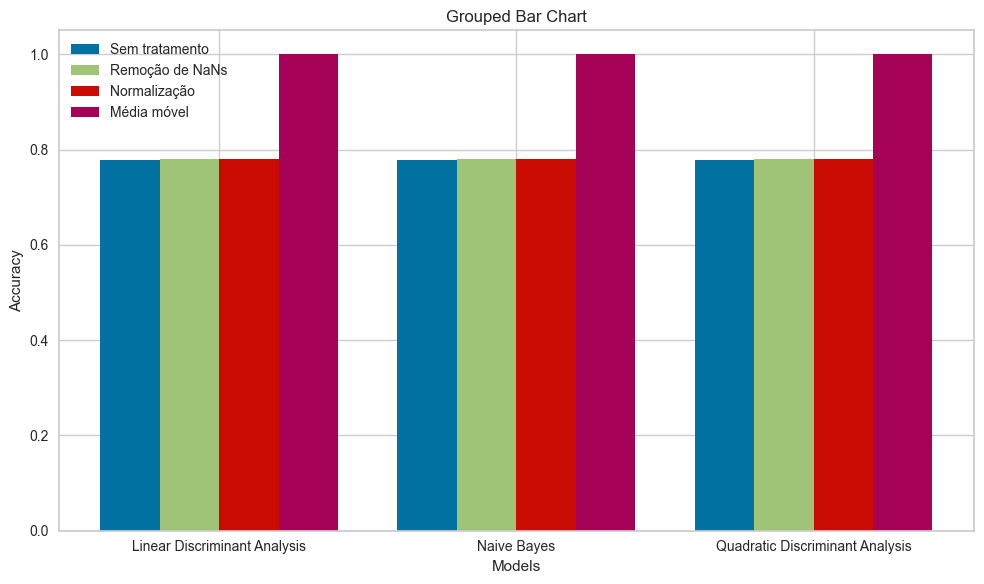

In [44]:
# Example usage:
group_labels = ['Sem tratamento', 'Remoção de NaNs', 'Normalização', 'Média móvel']
generate_grouped_bar_chart(trainning_results_raw, trainning_results_raw_zeros,
                           trainning_results_raw_zeros_norm, trainning_results_raw_zeros_norm_ma,
                           group_labels)

# 8. Discussão

Embora o resultado para a criação de alguns classificadores tenham apresentado alta acurácia, ainda é necessário avaliar se isto não se deve a uma possível sobreajuste do modelo aos dados de treinamento. Portanto, é essencial realizar uma validação rigorosa por meio de técnicas como a validação cruzada, para verificar a capacidade do classificador de generalizar seu desempenho para dados não vistos. Além disso, a interpretação dos resultados deve considerar métricas além da acurácia, como precisão, recall, F1-score e matriz de confusão, para obter uma compreensão mais completa do desempenho do modelo em diferentes aspectos, especialmente em situações de desequilíbrio de classes. É crucial adotar uma abordagem holística na avaliação de modelos de machine learning, visando não apenas à alta acurácia, mas também à sua capacidade de fazer previsões robustas e confiáveis em cenários do mundo real.






